## Preprocessing of MIRACL_V1
- Please download MIRACL_V1 dataset
- Change data and folder paths as needed 

## Mount Google Drive + Check Data Path 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#check if data directory exists
#change path as needed
if os.path.exists("/content/drive/MyDrive/Final Project/Data/MIRACLV1"):
  print("Data already downloaded.")

Data already downloaded.


In [ ]:
#unzip MIRACL_V1 dataset 
!unzip "/content/drive/MyDrive/Final Project/Data/MIRACL-VC1_all_in_one.zip" -d "/content/drive/MyDrive/Final Project/Data/MIRACLV1"

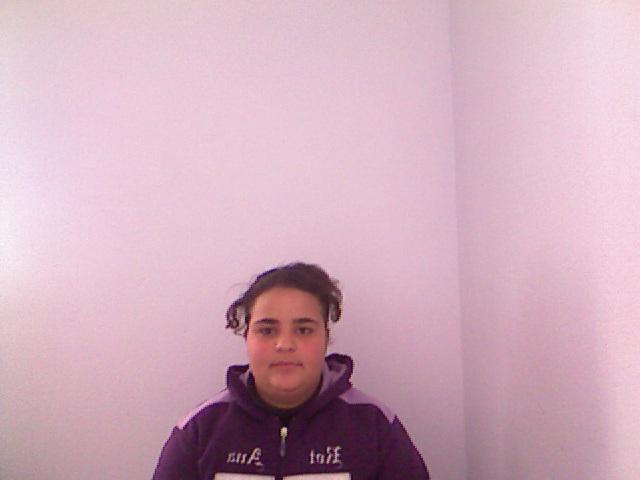

In [ ]:
from PIL import Image
#sample image of what an image looks like
#change path as needed 
img = Image.open("/content/drive/MyDrive/Final Project/Data/MIRACLV1/F02/words/01/01/color_001.jpg")
img

## Download packages and modules

In [ ]:
!pip install dlib
!pip install imutils
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import os
import imutils
import dlib
import cv2 

import imageio
from imutils import face_utils

In [ ]:
#download shape_predictor from dlib 
!wget "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2022-12-17 02:49:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.3’

shape_predictor_68_ 100%[===================>]  61.07M  20.6MB/s    in 3.0s    

2022-12-17 02:49:13 (20.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.3’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.
bzip2: Input file /content/drive/MyDrive/Final Project is a directory.


## Preprocessing: Mouth Detection, Cropping and Saving Images

In [ ]:
def rect_to_bbox(rect):
  # take a bounding predicted by dlib and convert it
  # to the format (x, y, w, h) as we would normally do
  # with OpenCV
  x = rect.left()
  y = rect.top()
  w = rect.right() - x
  h = rect.bottom() - y

  # return a tuple of (x, y, w, h)
  return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
  # initialize the list of (x, y)-coordinates
  coords = np.zeros((68, 2), dtype=dtype)

  # loop over the 68 facial landmarks and convert them
  # to a 2-tuple of (x, y)-coordinates
  for i in range(0, 68):
    coords[i] = (shape.part(i).x, shape.part(i).y)

  # return the list of (x, y)-coordinates
  return coords

In [ ]:
#function to detect mouth in image, then crop and save preprocessed image
def mouth_detection_crop_save(img_path,write_img_path):
  detector = dlib.get_frontal_face_detector()
  predictor_path = "/content/shape_predictor_68_face_landmarks.dat"  #change predictor path as needed
  predictor = dlib.shape_predictor(predictor_path)
  #load image, resize image, and convert to grayscale image
  image = cv2.imread(img_path)
  image = imutils.resize(image, width=500)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #detect face in the grayscale iamge
  rects = detector(gray, 1)
  #check that only one face is detected 
  if len(rects) > 1:
    print( "ERROR: more than one face detected") 
    return None
  if len(rects) < 1:
    print( "ERROR: no faces detected")
    return None
  #iterate through faces, crop mouth 
  for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    #mouth can be accessed through points [48,68]
    name, i, j = 'mouth', 48, 68
    #create bounding rectangle for mouth which is our region of interest
    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))        
    roi = gray[y:y+h, x:x+w]
    roi = imutils.resize(roi, width = 250, inter=cv2.INTER_CUBIC)  
    Image.fromarray(roi).save(write_img_path)

In [ ]:
import os 
#check if folder containing preprocessed images exists
data_path = "/content/drive/MyDrive/Final Project/Data"  #change data_path as needed
preprocess_path = "/preprocessed_data"
if not os.path.exists(data_path+preprocess_path):
  os.mkdir(data_path+preprocess_path)
  print("Succesfully created directory!")
else: 
  print("Directory containing preprocessed images already exists.")

Directory already exists.


In [ ]:
#dataset folder and subfolder names
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
level = ['words']
word_nums = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [ ]:
words_di

{0: 'Begin',
 1: 'Choose',
 2: 'Connection',
 3: 'Navigation',
 4: 'Next',
 5: 'Previous',
 6: 'Start',
 7: 'Stop',
 8: 'Hello',
 9: 'Web'}

In [ ]:
def preprocess_data():
  folder_path = "/content/drive/MyDrive/Final Project/Data" #change folder path as needed
  path = folder_path+"/preprocessed_data"
  #iterate through all people
  for person_id in people:
    person_path = path+'/'+person_id
    if not os.path.exists(person_path):
      os.mkdir(person_path)
    #iterate through level (aka words)
    for lvl in level:
      lvl_path = person_path+"/"+lvl
      if not os.path.exists(lvl_path):
        os.mkdir(lvl_path)
      
      #iterate through all words
      for word_num in word_nums:
        word_path = lvl_path+"/"+word_num
        if not os.path.exists(word_path):
          os.mkdir(word_path)

        #iterate through all instances of word
        for instance_id in instances:
          instance_path = word_path+"/"+instance_id

          directory_path = folder_path+"/MIRACLV1/"+person_id+"/"+lvl+"/"+word_num+"/"+instance_id
          #get list of files under original dataset 
          files = os.listdir(directory_path)
          if not os.path.exists(instance_id):
            os.mkdir(instance_path)
            #iterate through all colour jpg of word instance
            for img_name in files:
              if img_name.startswith('color'):
                mouth_detection_crop_save(directory_path+"/"+img_name, instance_path+"/"+img_name)
                print("Crop and saved to...", instance_path+"/"+img_name)          

In [ ]:
preprocess_data()